In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import gspread
from google.auth import default
creds,_=default()
gs=gspread.authorize(creds)
import pandas as pd


In [ ]:
ws=gs.open('My sheet').sheet1
data1=ws.get_all_values()
df=pd.DataFrame(data1[1:],columns=data1[0])
df=df.astype({'INPUT':'float'})
df=df.astype({'OUTPUT':'float'})
df.head()


,INPUT,OUTPUT
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
X=df[['INPUT']].values
y=df[['OUTPUT']].values
print(X)

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from keras.layers import Activation, Dense

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)
model = Sequential([
    Dense(5,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 6832.7578
Epoch 2/2000
1/1 [==============================] - 0s 18ms/step - loss: 6798.2739
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 6773.2061
Epoch 4/2000
1/1 [==============================] - 0s 16ms/step - loss: 6752.1870
Epoch 5/2000
1/1 [==============================] - 0s 13ms/step - loss: 6733.5078
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 6716.3726
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 6700.3403
Epoch 8/2000
1/1 [==============================] - 0s 18ms/step - loss: 6685.1353
Epoch 9/2000
1/1 [==============================] - 0s 11ms/step - loss: 6670.5703
Epoch 10/2000
1/1 [==============================] - 0s 11ms/step - loss: 6656.5176
Epoch 11/2000
1/1 [==============================] - 0s 29ms/step - loss: 6642.8799
Epoch 12/2000
1/1 [==============================] - 0s 11ms/step - loss: 6629.5850
Epo

0.00893117394298315

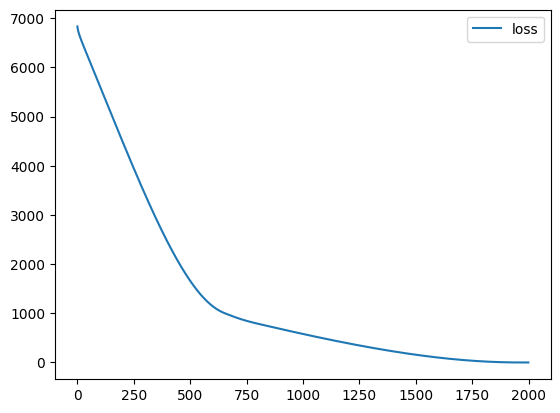

In [ ]:

model.compile(optimizer='rmsprop',loss = 'mse')

model.fit(X_train1,y_train,epochs=2000)
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
X_test1 = Scaler.transform(X_test)
model.evaluate(X_test1,y_test)

In [ ]:
X_n1 = [[25]]
X_n1_1 = Scaler.transform(X_n1)
model.predict(X_n1_1)

array([[251.10439]], dtype=float32)